# Lung diseases prediction with Convolutional Neural Network (Deep learning)
Óscar Poblete Sáenz <br>
Course: Introduction to Artificial Intelligence <br>
Teacher: Elizabeth Guevara Martinez<br>
Universidad Anáhuac <br> <br>
The goal is to try out a model that detects and classifies lung diseases from **X-rays** images of the chest.
There are 133 images that belong to **4 classes**:


*   Healthy
*   COVID-19 
*   Bacterial pneumonia
*   Viral pneumonia <br><br>

Images from the Université de Montréal project:
https://github.com/ieee8023/covid-chestxray-dataset
Based on the work carried out by a group from Telefónica Digital España S.L.U.
https://colab.research.google.com/drive/1D31N0nvx2VXMPNdefYjW4GRha1MrxlJr?usp=drive_open#scrollTo=lIsvnVsLTm_w

Tip: Check https://teachablemachine.withgoogle.com/ to understand the purpose and operation of this type of networks

In [1]:
# Import libraries
import tensorflow.keras #Tensorflow
import numpy as np # Vectors and matrices
import cv2 # cv2 is the import name of the module for opencv-python. It allows to perform image processing and artificial vision tasks.
from skimage import io # Read the image, convert it from JPG to a NumPy array.

In [2]:
# Load image
medical_image = io.imread('/content/Covid_Testing (1).jpeg')

Imagen de paciente


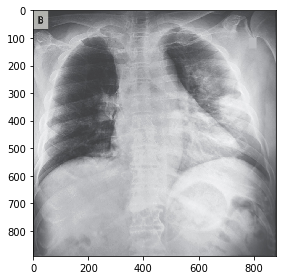

In [3]:
# Show image
print("Patient image")
io.imshow(medical_image)

In [ ]:
# Load obtained model in Teachable Machine
model = tensorflow.keras.models.load_model('/content/keras_model.h5')

In [6]:
# CNN architecture
# In teachable machine the first layer is convolution and the last layer is classification
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 1280)              410208    
                                                                 
 sequential_3 (Sequential)   (None, 4)                 128500    
                                                                 
Total params: 538,708
Trainable params: 524,628
Non-trainable params: 14,080
_________________________________________________________________


In [7]:
# First layer
model.get_layer(name='sequential_1').summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model1 (Functional)         (None, 7, 7, 1280)        410208    
                                                                 
 global_average_pooling2d_Gl  (None, 1280)             0         
 obalAveragePooling2D1 (Glob                                     
 alAveragePooling2D)                                             
                                                                 
Total params: 410,208
Trainable params: 396,128
Non-trainable params: 14,080
_________________________________________________________________


In [8]:
# Description of the first layer
# It is important to review the input layer to verify the size of the image (input size)
model.get_layer(name='sequential_1').get_layer(name='model1').summary()

Model: "model1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1_pad (ZeroPadding2D)      (None, 225, 225, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 16  432         ['Conv1_pad[0][0]']              
                                )                                                                 
                                                                                             

In [ ]:
#Resumen de la capa de salida
#La ultima capa nos indica cuantas clases se están manejando
model.get_layer(name='sequential_3').summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_Dense1 (Dense)        (None, 100)               128100    
                                                                 
 dense_Dense2 (Dense)        (None, 4)                 400       
                                                                 
Total params: 128,500
Trainable params: 128,500
Non-trainable params: 0
_________________________________________________________________


##Evaluate model

In [9]:
# Image size
medical_image.shape

(891, 880, 3)

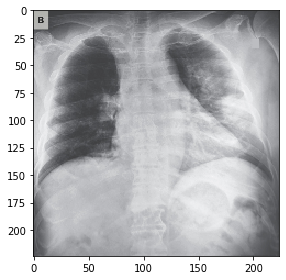

In [10]:
# Change image size to input size
medical_image2=cv2.resize(medical_image,(224,224))
io.imshow(medical_image2)

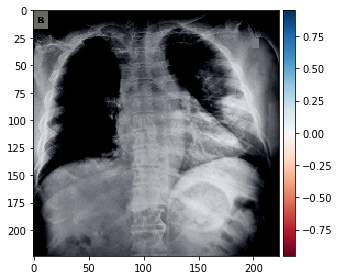

In [11]:
# Normalize image
normalized_medical_image = (medical_image2.astype(np.float32) / 127.0) -1

# Show 
io.imshow(normalized_medical_image)

In [12]:
# Generate an array to save images and test the model
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

In [13]:
# Load an image into the array
data[0] = normalized_medical_image

In [14]:
# Make prediction
prediction=model.predict(data)[0]
print(prediction)

1/1 [==============================] - 1s 1s/step
[5.6051283e-07 9.9994779e-01 5.0790029e-05 7.7803617e-07]


In [15]:
# Load the labels
# Separate with line break to make a list of values
with open('labels.txt', 'r') as f:
  labels = f.read().split('\n')

In [16]:
# Print prediction
index = np.argmax(prediction) # Take the maximum of the probabilities to obtain the class
# It will tell us the most probable class for the image we load
print("The most likely class is'{}' with a confidence of {}%".format(labels[index], np.round(prediction[index]*100, 3)))

The most likely class is'1 Covid-19' with a confidence of 99.995%
